# PREDATOR: **PRED**icting the imp**A**ct of cancer somatic mu**T**ations on pr**O**tein-protein inte**R**actions


## GBM


<b><i class="fa fa-folder-o" area-hidden="true" style="color:#1976D2"> </i>&nbsp; File Location</b><br>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">Predator\src</code>
</p>

<b><i class="far fa-file" area-hidden="true" style="color:#1976D2"> </i>&nbsp; File Name</b>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">PredatorStudy_GBM.ipynb</code>
</p>

<b><i class="far fa-calendar-alt" area-hidden="true" style="color:#1976D2"> </i>&nbsp; Last Edited</b>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">June 17th, 2022</code>
</p>


<div class="alert alert-block" style="background-color: #F5F5F5; border: 1px solid; padding: 10px; border-color: #E0E0E0">
    <b><i class="fa fa-compass" aria-hidden="true" style="color:#404040"></i></b>&nbsp; <b style="color: #404040">Purpose </b> <br>
<div>
   
- [x] Apply on Cancer Datasets
    > GBM
    
**Dependent files:**

* Target (Cancer) data: 
    - *GBM_Interface.txt*

In [5]:
from pathlib import Path

from helpers.helpers_predator.displayers import (
    visualize_label_counts,
    display_data,
)

from helpers.helpers_predator.common import load_predator

# PATHS
GBM_PATH = Path(r"../data/Elaspic_merged_results/GBM_Interface_2021-11-17.txt")
PREDATOR_MODEL_PATH = Path(r"PredatorModels/PredatorModel_2022-06-16/cc84a54e/predator.pkl")
PREDICTIONS_DATASETS_FOLDER_PATH = "../data/predictions_datasets/"

# Reflect changes in the modules immediately.
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the Predator

In [2]:
predator = load_predator(PREDATOR_MODEL_PATH)

2022-06-17 00:44:28 | INFO     | helpers.helpers_predator.common | Predator object PredatorModels\PredatorModel_2022-06-16\cc84a54e\predator.pkl is loaded successfully.


## Prediction TCGA on Cancer Dataset: GBM

In [3]:
predator.initialize_target_data_materials(
    tcga_code_path_pairs=[('gbm', GBM_PATH)]
)

2022-06-17 00:44:28 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `gbm` ..
2022-06-17 00:44:28 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `target_gbm_data` ..
2022-06-17 00:44:28 | DEBUG    | helpers.helpers_predator.data_materials | Initializing target data materials ..
2022-06-17 00:44:28 | DEBUG    | helpers.helpers_predator.data_materials | Determined features: ['EL2_score', 'Provean_score', 'Final_ddG', 'Interactor_alignment_score', 'Matrix_score', 'Solvent_accessibility_wt', 'van_der_waals_mut', 'Solvent_accessibility_mut', 'Interactor_template_sequence_identity', 'solvation_polar_wt']
2022-06-17 00:44:28 | DEBUG    | helpers.helpers_predator.data_materials | Declaring Xs_gbm data materials  ..


#### TCGA Cancer Datasets

##### GBM

In [4]:
display_data(predator.data_materials["gbm"])

Data dimensions: (5631, 103)


,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,Domain_clan,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,P46734,P46734,K200E,done,interface,-,-,-,Pkinase,Pkinase,...,640.0,140.8630,140.8620,115.263,115.263,522.24,286.075,808.315,2.74325,2.74325
1,P46734,P46734,K200E,done,interface,-,-,-,Pkinase,Pkinase,...,596.0,88.7587,88.7927,264.825,264.825,None,None,None,3.68021,3.59315
2,P46734,P46734,K200E,done,interface,-,-,-,Pkinase,Pkinase,...,622.0,252.2520,252.2990,112.394,112.522,None,None,None,2.95347,2.95347


#### Preprocessed TCGA Cancer Datasets

##### GBM

In [6]:
display_data(predator.data_materials["target_gbm_data"])

Data dimensions: (5631, 61)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Template_sequence_identity,Alignment_score,Interactor_template_sequence_identity,Interactor_alignment_score,Final_ddG,ProtBert_score,ProteinSolver_score,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,P46734,K200E,P27361,0.2593,0.265785,0.8757,0.857142,0.461337,0.276329,0.154538,...,640.0,140.8630,140.8620,115.263,115.263,522.24,286.075,808.315,2.74325,2.74325
1,P46734,K200E,P27361-2,0.8112,0.806540,0.2959,0.253635,-0.891666,0.259010,-0.033457,...,596.0,88.7587,88.7927,264.825,264.825,0.00,0.000,0.000,3.68021,3.59315
2,P46734,K200E,P27361-3,0.2593,0.265785,0.8675,0.827016,0.677915,0.274909,0.204851,...,622.0,252.2520,252.2990,112.394,112.522,0.00,0.000,0.000,2.95347,2.95347


### Voting mode: `soft`

In [7]:
predator.initialize_target_data_materials(
    tcga_code_path_pairs=[('gbm', GBM_PATH)]
)

2022-06-17 00:44:43 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `gbm` ..
2022-06-17 00:44:43 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `target_gbm_data` ..
2022-06-17 00:44:44 | DEBUG    | helpers.helpers_predator.data_materials | Initializing target data materials ..
2022-06-17 00:44:44 | DEBUG    | helpers.helpers_predator.data_materials | Determined features: ['EL2_score', 'Provean_score', 'Final_ddG', 'Interactor_alignment_score', 'Matrix_score', 'Solvent_accessibility_wt', 'van_der_waals_mut', 'Solvent_accessibility_mut', 'Interactor_template_sequence_identity', 'solvation_polar_wt']
2022-06-17 00:44:44 | DEBUG    | helpers.helpers_predator.data_materials | Declaring Xs_gbm data materials  ..


In [8]:
predator.predict(voting='soft')

2022-06-17 00:44:44 | DEBUG    | Predator | Predicting on cancer datasets ..
2022-06-17 00:44:44 | DEBUG    | helpers.helpers_predator.models | Initializing EnsambledVotingClassifier.
2022-06-17 00:44:44 | DEBUG    | helpers.helpers_predator.models | Voting mode: soft
2022-06-17 00:44:44 | DEBUG    | helpers.helpers_predator.predictions | Initializing: PredictionsSoft
2022-06-17 00:44:44 | DEBUG    | Predator | Predicting on gbm cohort ..
2022-06-17 00:44:44 | DEBUG    | helpers.helpers_predator.models | Current estimator: RandomForestClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=380, random_state=3279)
2022-06-17 00:44:44 | DEBUG    | helpers.helpers_predator.models | X shape: (5631, 10)
2022-06-17 00:44:45 | DEBUG    | helpers.helpers_predator.models | Current estimator: RandomForestClassifier(class_weight='balanced', max_depth=2, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=90,
                   

In [9]:
predator.predictions.keys()

dict_keys(['gbm_prob'])

In [10]:
# Predictions for first 10 experiment.
predator.predictions["gbm_prob"][:3]

[array([[0.83680472, 0.16319528],
        [0.89936473, 0.10063527],
        [0.7194312 , 0.2805688 ],
        ...,
        [0.78268801, 0.21731199],
        [0.73794227, 0.26205773],
        [0.73794227, 0.26205773]]),
 array([[0.76129843, 0.23870157],
        [0.75541749, 0.24458251],
        [0.72814352, 0.27185648],
        ...,
        [0.80583958, 0.19416042],
        [0.71273915, 0.28726085],
        [0.71273915, 0.28726085]]),
 array([[0.88469682, 0.11530318],
        [0.9568771 , 0.0431229 ],
        [0.88977661, 0.11022339],
        ...,
        [0.81609842, 0.18390158],
        [0.78932315, 0.21067685],
        [0.78932315, 0.21067685]])]

#### Predictions Post Processing

Post processing of predictions involves following steps:

##### 1. Merging Predictions with SNV Data

The prediction column is merged with SNV data for each experiment.

$\text{For each experiment } n: $

$$
  \textit{(Prediction Merged Data)}_n = \underbrace{[\textit{Predictions}_n]}_\text{Probs Percentages} + 
      \underbrace{[\textit{Protein }] [\textit{Mutation }] [\textit{Interactor }]}_\text{Cancer Data Triplets} + \underbrace{[\textit{Features }] }_\text{Elaspic}
$$


##### 2. Convert to 1-isomer: `Interactor_UniProt_ID`

$\textit{Interactor_UniProt_ID}$ column contains isomer proteins. Here, we convert them into primary isoform representation (i.e. without dashes).

| Interactor_UniProt_ID |
--------------
| P38936     |
| P16473     |
| P16473-2   |
| P19793     |

##### 3. Dropping Invalid Predictions

Entries whose predicted class-1 probability lies in both `Decreasing` and `Increasing+NoEff` are dropped.

Due to having different features for the same $\textit{(protein, mutation, interactor)}$ triplet from ELASPIC, the triplet $\textit{(protein, mutation, interactor)}$ may contain class-1 probability prediction of both lower than 0.50 and higher than 50. We drop such instances.

In [11]:
predator.predictions_post_process()

2022-06-17 00:45:01 | DEBUG    | helpers.helpers_predator.predictions | PredictionsSoft
2022-06-17 00:45:01 | DEBUG    | helpers.helpers_predator.predictions | Post processing predictions for cohort gbm ..
2022-06-17 00:45:01 | DEBUG    | helpers.helpers_predator.predictions | PredictionsSoft
2022-06-17 00:45:01 | DEBUG    | helpers.helpers_predator.predictions | Merging predictions with gbm cancer dataset ..
2022-06-17 00:45:01 | DEBUG    | helpers.helpers_predator.predictions | Handling valid and invalid entries ..


  0%|          | 0/38 [00:00<?, ?it/s]

2022-06-17 00:45:22 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 595): 
   PREDICTION PROTEIN MUTATION INTERACTOR
0    0.540427  P09936    E211K     P0CG47
1    0.777459  P09936    E211K     P0CG47
2    0.479522  P09936    E211K     P0CG47
3    0.358610  Q969K4    N142K     Q13618
4    0.524688  Q969K4    N142K     Q13618
2022-06-17 00:45:42 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 595): 
   PREDICTION PROTEIN MUTATION INTERACTOR
0    0.409920  P09936    E211K     P0CG47
1    0.561822  P09936    E211K     P0CG47
2    0.393915  P09936    E211K     P0CG47
3    0.496732  Q9BV40     F58C     P32856
4    0.612161  Q9BV40     F58C     O00161
2022-06-17 00:46:04 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 775): 
   PREDICTION PROTEIN MUTATION INTERACTOR
0    0.396721  Q969V5    V303G     P51965
1    0.795662  Q969V5    V303G     P51965
2    0.

In [12]:
predator.predictions.keys()

dict_keys(['gbm_prob', 'gbm_predicted_probs_datasets', 'gbm_predicted_valid_datasets', 'gbm_predicted_invalid_datasets', 'gbm_finalized_prediction_dataframes'])

In [13]:
display_data(predator.predictions["gbm_predicted_probs_datasets"][0])

Data dimensions: (5631, 104)


,Prediction,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,0.163195,P46734,P46734,K200E,done,interface,-,-,-,Pkinase,...,640.0,140.8630,140.8620,115.263,115.263,522.24,286.075,808.315,2.74325,2.74325
1,0.100635,P46734,P46734,K200E,done,interface,-,-,-,Pkinase,...,596.0,88.7587,88.7927,264.825,264.825,None,None,None,3.68021,3.59315
2,0.280569,P46734,P46734,K200E,done,interface,-,-,-,Pkinase,...,622.0,252.2520,252.2990,112.394,112.522,None,None,None,2.95347,2.95347


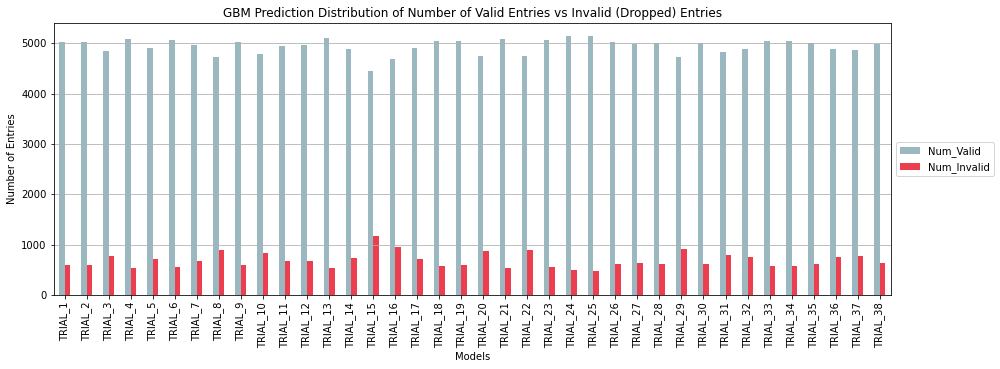

In [14]:
predator.predictions.plot_distribution_valid_vs_invalid("gbm")

2022-06-17 09:25:14 | DEBUG    | helpers.helpers_predator.predictions | Plotting number of finalized predictions per model.
Note that following plot shows the number of (protein, mutation, interactor) triplets which had valid prediction.


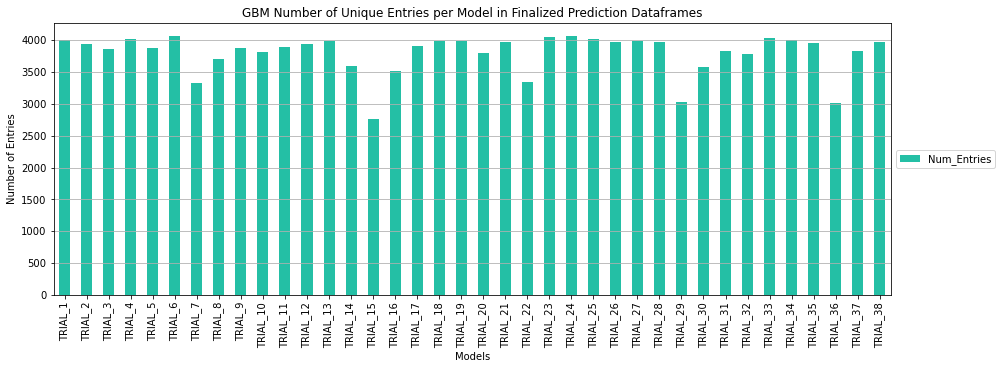

In [15]:
predator.predictions.plot_num_finalized_predictions("gbm")

In [16]:
display_data(predator.predictions['gbm_finalized_prediction_dataframes'][0])

Data dimensions: (4014, 4)


,Prediction,UniProt_ID,Mutation,Interactor_UniProt_ID
0,0.163195,P46734,K200E,P27361
1,0.100635,P46734,K200E,P27361
2,0.280569,P46734,K200E,P27361


In [17]:
predator.prepare_ensemble_prediction_data()

2022-06-17 09:25:27 | INFO     | helpers.helpers_predator.predictions | PredictionsSoft
2022-06-17 09:25:27 | INFO     | helpers.helpers_predator.predictions | Preparing ensemble prediction data for gbm taking median ..


  0%|          | 0/38 [00:00<?, ?it/s]

2022-06-17 09:32:00 | DEBUG    | helpers.helpers_predator.predictions | Prediction probabilities data for gbm is prepared.
Accessible from `gbm_predictions_prob_data`.
2022-06-17 09:32:00 | DEBUG    | helpers.helpers_predator.predictions | Ensemble prediction data for gbm is prepared.
Accessible from `gbm_ensemble_prediction_data`.
2022-06-17 09:32:00 | DEBUG    | helpers.helpers_predator.predictions | Resulting prediction data is available for gbm.
Accessible from predictions.['gbm_prediction_results']
2022-06-17 09:32:00 | DEBUG    | helpers.helpers_predator.predictions | Resulting prediction data (no_votes dropped) is available for gbm.
Accessible from predictions.['gbm_prediction_results_no_votes_dropped']


In [18]:
display_data(predator.predictions['gbm_predictions_prob_data'])

Data dimensions: (3032, 40)


,Trial 0,Trial 1,Trial 2,Trial 3,Trial 4,Trial 5,Trial 6,Trial 7,Trial 8,Trial 9,...,Trial 30,Trial 31,Trial 32,Trial 33,Trial 34,Trial 35,Trial 36,Trial 37,PROB_1s_AVG,VOTED_PREDICTION
0,0.181466,0.251714,0.08955,0.211477,0.224938,0.135317,0.169393,0.150425,0.258642,0.24767,...,0.190687,0.191875,0.241668,0.097059,0.171609,0.0,0.218418,0.238131,0.18565,0
1,0.08099,0.210206,0.048727,0.107785,0.119938,0.052478,0.114435,0.004478,0.178768,0.053736,...,0.001668,0.038592,0.057842,0.076471,0.047177,0.0,0.059241,0.123513,0.08214,0
2,0.146882,0.279395,0.29198,0.131975,0.191446,0.082593,0.114435,0.011795,0.192076,0.101315,...,0.065896,0.128208,0.103706,0.111765,0.089455,0.166667,0.14323,0.209458,0.13307,0


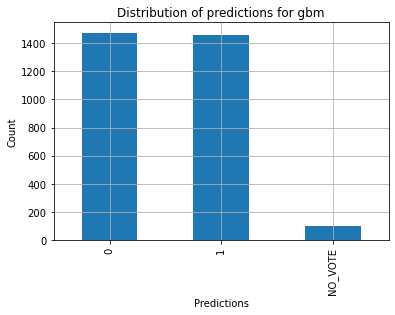

In [19]:
predator.predictions.plot_ensemble_prediction_distribution("gbm")

In [20]:
gbm_prediction_results_soft = predator.predictions['gbm_prediction_results']
display_data(gbm_prediction_results_soft)

Data dimensions: (3032, 4)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction
0,P46734,K200E,P27361,0
1,P46734,K200E,Q16512,0
2,P46734,K200E,Q5S007,0


In [21]:
gbm_prediction_results_soft_no_votes_dropped = predator.predictions["gbm_prediction_results_no_votes_dropped"]
display_data(gbm_prediction_results_soft_no_votes_dropped)

Data dimensions: (2934, 4)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction
0,P46734,K200E,P27361,0
1,P46734,K200E,Q16512,0
2,P46734,K200E,Q5S007,0


Label counts:
Increasing + No Effect    1476
Disrupting                1458
Name: Prediction, dtype: int64


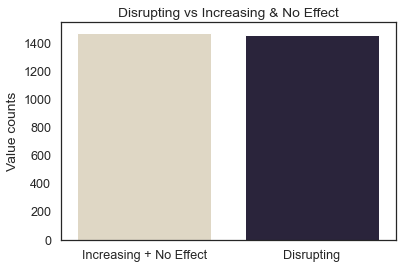

In [22]:
visualize_label_counts(gbm_prediction_results_soft_no_votes_dropped, 'Prediction')

In [23]:
gbm_ensemble_prediction_data_soft = predator.predictions["gbm_ensemble_prediction_data"]

In [24]:
gbm_predictions_prob_data_soft = predator.predictions["gbm_predictions_prob_data"]

In [25]:
def add_median_probabilities(prediction_results, predictions_prob_data):
    assert len(prediction_results) == len(predictions_prob_data)
    prediction_results_with_probabilities = prediction_results.copy()
    prediction_results_with_probabilities["Median_Probability"] = predictions_prob_data["PROB_1s_AVG"]
    return prediction_results_with_probabilities

In [26]:
gbm_prediction_results_soft_with_median_probs = add_median_probabilities(
    prediction_results=predator.predictions["gbm_prediction_results"],
    predictions_prob_data=predator.predictions["gbm_predictions_prob_data"]
)
gbm_prediction_results_soft_with_median_probs.head()

,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction,Median_Probability
0,P46734,K200E,P27361,0,0.18565
1,P46734,K200E,Q16512,0,0.08214
2,P46734,K200E,Q5S007,0,0.13307
3,P46734,K200E,Q9Y2U5,0,0.19098
4,P46734,K200E,Q99759,0,0.15147


In [27]:
gbm_prediction_results_soft_no_votes_dropped_with_median_probabilities = gbm_prediction_results_soft_with_median_probs[
    gbm_prediction_results_soft_with_median_probs['Prediction'].isin([0, 1])
]

In [28]:
len(gbm_prediction_results_soft_no_votes_dropped_with_median_probabilities)

2934

## Exporting Predictions

In [29]:
# gbm_prediction_results = gbm_prediction_results_hard_no_votes_dropped
# gbm_prediction_results = gbm_prediction_results_soft_no_votes_dropped
gbm_prediction_results = gbm_prediction_results_soft_no_votes_dropped_with_median_probabilities
display_data(gbm_prediction_results)

Data dimensions: (2934, 5)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction,Median_Probability
0,P46734,K200E,P27361,0,0.18565
1,P46734,K200E,Q16512,0,0.08214
2,P46734,K200E,Q5S007,0,0.13307


In [30]:
predator.export_prediction(
    tcga="gbm",
    data=gbm_prediction_results,
    file_name="predictions",
    folder_path=PREDICTIONS_DATASETS_FOLDER_PATH,
    voting="soft",
    overwrite=False,
    file_extension='csv'
)

2022-06-17 09:35:46 | DEBUG    | helpers.helpers_predator.common | Folder with ID 8d7f7caa is created.
2022-06-17 09:35:46 | DEBUG    | helpers.helpers_predator.common | Exporting data predictions at location ../data/predictions_datasets/ in folder gbm_prediction_2022-06-17\8d7f7caa..
2022-06-17 09:35:46 | INFO     | helpers.helpers_predator.common | ../data/predictions_datasets/gbm_prediction_2022-06-17\8d7f7caa\predictions_soft_2022-06-17.csv is exported successfully.
2022-06-17 09:35:47 | INFO     | helpers.helpers_predator.common | Config is exported.


---